In [1]:
class GraphU():
    global np
    global plt
    import numpy as np
    import matplotlib.pyplot as plt
    '''
    Function for creating undirected self
    '''
    
    def __init__(self):
        self.no_of_nodes=0
        self.char_counter=97
        self.nodes=[]
    def AddNodes(self, number):
        for i in range(number):
            self.nodes.append(Node(chr(self.char_counter)))
            self.char_counter+=1
            
    def Connect(self,mat):
        '''
        Connect function accepts a nested array represenging connections between 
        x and y in the form ['x':'y']. Connections can only be made between nodes
        already placed on self 
        
        example:
        m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
        >>> A.Connect(m)
        
        '''
        names=list(map(str,A.nodes))
        node_ords=list(map(ord,names))
        for row in mat:
            con_index1, con_index2 = node_ords.index(ord(row[0])), node_ords.index(ord(row[1]))
            self.nodes[con_index1].connections.append(self.nodes[con_index2])
            self.nodes[con_index2].connections.append(self.nodes[con_index1])
    
    @staticmethod
    def CreateAdjacency(adj_dict):
        '''
        Create Adjacency takes accepts an adjacency list represented in dictionary form as such:
        
        
        example:
        
        a={'a':['b','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}        
        A.CreateAdjacency(a)
                
        >>> [['a', 'c'],
        >>> ['a', 'g'],
        >>> ['b', 'd'],
        >>> ['b', 'f'],
        >>> ['b', 'g'],
        >>> ['b', 'h'],
        >>> ['c', 'g'],
        >>> ['c', 'h'],
        >>> ['c', 'k'],
        >>> ['c', 'm']]
        This creates an expanded adjacency list to be used by the Connect Function
        '''
        keys=list(adj_dict.keys())
        values=list(adj_dict.values())
        adj_list=[]
        for i in range(len(keys)):
            for j in range (len(values[i])):
                if ([values[i][j],keys[i]] not in adj_list):
                    adj_list.append([keys[i],values[i][j]])
                else:
                    pass
        return(adj_list)

    def BFS(self,start):
        '''
        Peforms a Breadth First Search on Undirected Graph
        
        example:
        A.BFS('e')
        
        >>> [e, z, n, x, o, g, w, c, f, k, u, b, i, p, y, j, v, h, l, r, q, m, t, d, a, s]
        
        example2:
        A.BFS('o')
        
        >>> [o, s, y, p, l, e, u, i, x, c, k, d, z, n, b, r, a, f, m, t, w, g, v, j, h, q]
        
        '''
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        k=0
        frontier=[spec]
        visited=[]
        frontier_len=len(frontier)
        while k<frontier_len:
            spec=frontier[k]
            visited.append(spec)
            conns=spec.connections
            for i in range(len(conns)):
                if conns[i] not in frontier:
                    frontier.append(conns[i])
                frontier_len=len(frontier)
            k=k+1
        return(visited)
    
    
    def DFS(self,start):
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        k=0
        visited=[]
        global vbefore
        global vafter
        vafter=0
        vbefore=0
        return(self.forward(spec,visited,k,vbefore,vafter))
        
    
    def forward(self,spec,visited,k,vbefore,vafter):
        i=0
        while spec.connections[i] in visited and i+1<len(spec.connections):
            i=i+1   
        if spec.connections[i] not in visited:
            visited.append(spec.connections[i])
            spec=spec.connections[i]
            k=1
            self.forward(spec,visited,k,vbefore,vafter)
        else:
            k=k+1
        if k!=len(visited):
            spec=visited[-k]
            self.forward(spec,visited,k,vbefore,vafter)
        else:
            pass
        return(visited)
        
    

    def PotentialConnections(self):
        i=len(self.nodes)-1
        d=0
        while i!=0:
            d=d+i
            i=i-1
        return(d)
    
    def Connections(self,connectivity):
        pot_con=self.PotentialConnections()
        return(pot_con,round(pot_con*connectivity))
    
    def RandomConnections(self,connectivity):
        pot_con, desired_connections=self.Connections(connectivity)
        ords=list(map(ord,list(map(str, self.nodes))))
        i=0
        adj_list=[]
        while i<desired_connections:
            Node1=str(np.random.choice(np.array(self.nodes)))
            Node2=str(np.random.choice(np.array(self.nodes)))
            index=list(map(str,self.nodes)).index(Node1)
            if (Node1!=Node2)and(Node2 not in list(map(str, (self.nodes[index].connections)))):
                self.Connect([[Node1,Node2]])
                adj_list.append([Node1,Node2])
                i=i+1
            else:
                pass
        return(r'{} connections made of {}').format(len(adj_list),pot_con)
        del(pot_con)
        
    def DegreeDistribution(self):
        DegreeDist=[len(self.nodes[i].connections) for  i in range(len(self.nodes))]
        counts,bin_edges=np.histogram(DegreeDist)
        plt.figure(figsize=(15,10))
        plt.hist(DegreeDist, range=[min(bin_edges-0.5),max(bin_edges+0.5)], align='mid')
        plt.xlabel('Degree')
        plt.ylabel('Number of Nodes')
        plt.show()

class Node(GraphU):
    def __init__(self,name):
        self.name=name
        self.connections=[]
    def __repr__(self):
        return(self.name)

In [2]:
A=GraphU()

<B><center>Node Addition

In [3]:
A.AddNodes(20)
A.nodes

[a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t]

<center><B> Random sampling of Connections using Acceptance/Rejection Concept

<I><center>Function is additive (i.e. does not consider previous connections), thus it should only be used once per graph instance


In [4]:
A.RandomConnections(0.8)

'152 connections made of 190'

<B><center>Degree Distribution Plot

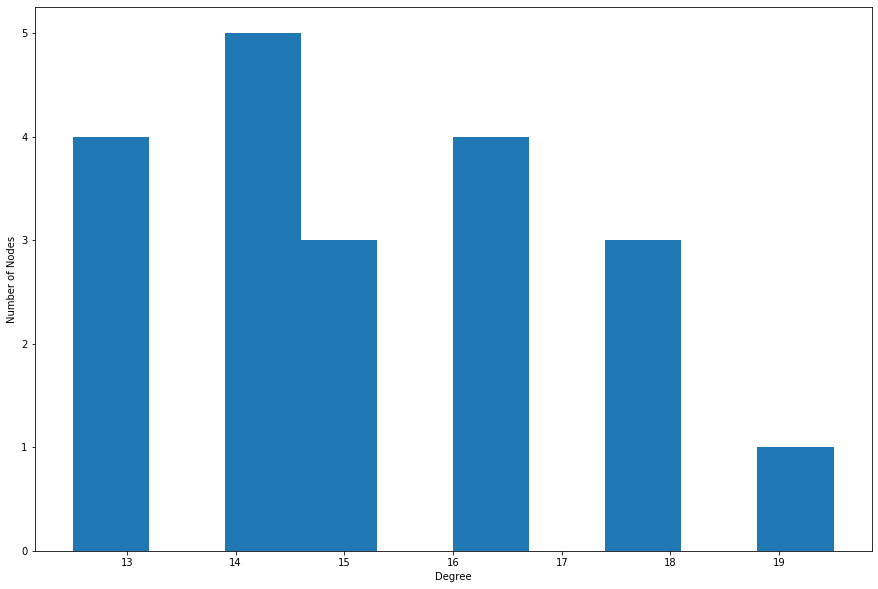

In [5]:
A.DegreeDistribution()

<B><center> Connections Made Through Expanded Adjacency List

In [6]:
m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
A.Connect(m)

<B><center> BFS

In [7]:
A.BFS('g')

[g, s, k, t, a, i, p, d, h, c, r, f, e, j, q, o, b, l, n, m]

<center><B>DFS

In [8]:
A.DFS('e')

[i, e, t, m, n, j, o, d, r, k, s, g, a, p, l, c, h, q, b, f]

<B><center>Adj List Creation From Dictionary

In [9]:
a={'a':['c','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}
A.CreateAdjacency(a)

[['a', 'c'],
 ['a', 'g'],
 ['b', 'd'],
 ['b', 'f'],
 ['b', 'g'],
 ['b', 'h'],
 ['c', 'g'],
 ['c', 'h'],
 ['c', 'k'],
 ['c', 'm']]

In [ ]:
class GraphU():
    global np
    global plt
    import numpy as np
    import matplotlib.pyplot as plt
    '''
    Function for creating undirected self
    '''
    
    def __init__(self):
        self.no_of_nodes=0
        self.char_counter=97
        self.nodes=[]
    def AddNodes(self, number):
        for i in range(number):
            self.nodes.append(Node(chr(self.char_counter)))
            self.char_counter+=1
            
    def Connect(self,mat):
        '''
        Connect function accepts a nested array represenging connections between 
        x and y in the form ['x':'y']. Connections can only be made between nodes
        already placed on self 
        
        example:
        m=[['a','b'],['b','c'],['b','d'],['b','e'],['c','d'],['c','f'],['c','g'],['g','e'],['d','e'],['a','f']]    
        >>> A.Connect(m)
        
        '''
        names=list(map(str,A.nodes))
        node_ords=list(map(ord,names))
        for row in mat:
            con_index1, con_index2 = node_ords.index(ord(row[0])), node_ords.index(ord(row[1]))
            self.nodes[con_index1].connections.append(self.nodes[con_index2])
            self.nodes[con_index2].connections.append(self.nodes[con_index1])
    
    @staticmethod
    def CreateAdjacency(adj_dict):
        '''
        Create Adjacency takes accepts an adjacency list represented in dictionary form as such:
        
        
        example:
        
        a={'a':['b','g'],'b':['d','f','g','h'],'c':['a','g','h','k','m']}        
        A.CreateAdjacency(a)
                
        >>> [['a', 'c'],
        >>> ['a', 'g'],
        >>> ['b', 'd'],
        >>> ['b', 'f'],
        >>> ['b', 'g'],
        >>> ['b', 'h'],
        >>> ['c', 'g'],
        >>> ['c', 'h'],
        >>> ['c', 'k'],
        >>> ['c', 'm']]
        This creates an expanded adjacency list to be used by the Connect Function
        '''
        keys=list(adj_dict.keys())
        values=list(adj_dict.values())
        adj_list=[]
        for i in range(len(keys)):
            for j in range (len(values[i])):
                if ([values[i][j],keys[i]] not in adj_list):
                    adj_list.append([keys[i],values[i][j]])
                else:
                    pass
        return(adj_list)

    def BFS(self,start):
        '''
        Peforms a Breadth First Search on Undirected Graph
        
        example:
        A.BFS('e')
        
        >>> [e, z, n, x, o, g, w, c, f, k, u, b, i, p, y, j, v, h, l, r, q, m, t, d, a, s]
        
        example2:
        A.BFS('o')
        
        >>> [o, s, y, p, l, e, u, i, x, c, k, d, z, n, b, r, a, f, m, t, w, g, v, j, h, q]
        
        '''
        names=list(map(str, A.nodes))
        node_ords=list(map(ord,names))
        start_ord=node_ords.index(ord(start))
        spec=self.nodes[start_ord]
        conns=spec.connections
        conns_len=len(conns)
        k=0
        frontier=[spec]
        visited=[]
        frontier_len=len(frontier)
        while k<frontier_len:
            spec=frontier[k]
            visited.append(spec)
            conns=spec.connections
            for i in range(len(conns)):
                if conns[i] not in frontier:
                    frontier.append(conns[i])
                frontier_len=len(frontier)
            k=k+1
        return(visited)
    
    def PotentialConnections(self):
        i=len(self.nodes)-1
        d=0
        while i!=0:
            d=d+i
            i=i-1
        return(d)
    
    def Connections(self,connectivity):
        pot_con=self.PotentialConnections()
        return(pot_con,round(pot_con*connectivity))
    
    def RandomConnections(self,connectivity):
        pot_con, desired_connections=self.Connections(connectivity)
        ords=list(map(ord,list(map(str, self.nodes))))
        i=0
        adj_list=[]
        while i<desired_connections:
            Node1=str(np.random.choice(np.array(self.nodes)))
            Node2=str(np.random.choice(np.array(self.nodes)))
            index=list(map(str,self.nodes)).index(Node1)
            if (Node1!=Node2)and(Node2 not in list(map(str, (self.nodes[index].connections)))):
                self.Connect([[Node1,Node2]])
                adj_list.append([Node1,Node2])
                i=i+1
            else:
                pass
        return(r'{} connections made of {}').format(len(adj_list),pot_con)
        del(pot_con)
        
    def DegreeDistribution(self):
        DegreeDist=[len(self.nodes[i].connections) for  i in range(len(self.nodes))]
        counts,bin_edges=np.histogram(DegreeDist)
        plt.figure(figsize=(15,10))
        plt.hist(DegreeDist, range=[min(bin_edges-0.5),max(bin_edges+0.5)], align='mid')
        plt.xlabel('Degree')
        plt.ylabel('Number of Nodes')
        plt.show()

class Node(GraphU):
    def __init__(self,name):
        self.name=name
        self.connections=[]
    def __repr__(self):
        return(self.name)

In [ ]:
def fish():
    return('plankton')
def whale():
    return(fish())

whale()